In [1]:
using Paths, Plots
using LinearAlgebra

STEINER_POINTS = 2

function draw(nodeDict)
    nodes = [item.second for item in nodeDict]
    edges = []
    s = scatter(map(x -> x.position, nodes), legend=nothing)
    for node in nodes
    # node = nodeDict[(3.5, 3.5)]
        for neighbor in node.neighbors
            plot!([node.position[1], neighbor.node.position[1]], [node.position[2], neighbor.node.position[2]], arrow=true)
        end
    end
    display(s)
end

function scatterNodes(nodeDict)
    nodes = [item.second for item in nodeDict]
    positions = map(x -> x.position, nodes)
    s = scatter(positions, legend=nothing)
    return s
end


function drawPath(source, path, s)
    pos = map(x -> x.position, path)
    pos = vcat([source], pos)
    for i in 1:length(pos)-1
        plot!([pos[i][1], pos[i+1][1]], [pos[i][2], pos[i+1][2]])
    end
    display(s)
end

Precompiling Paths
  ✓ Paths
  1 dependency successfully precompiled in 2 seconds. 168 already precompiled.


drawPath (generic function with 1 method)

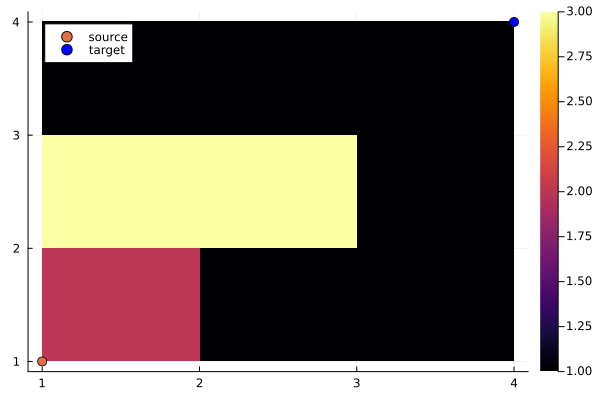

In [2]:
costs = [2. 3. 1.; 1. 3. 1.; 1. 1. 1.]
source = (1.0, 1.0)
target = (4.0, 4.0)
h = heatmap(1.5:3.5, 1.5:3.5, transpose(costs))
scatter!(source, label="source", ms=5)
scatter!(target, label="target", color="blue", ms=5)

In [3]:
nodesByPosition = Dict{Paths.Position, Node}(source => Node(source), target => Node(target))
visitedFaces = Set{Paths.Face}()
sourceNode = nodesByPosition[source]

Node((1.0, 1.0), Paths._Edge[])

In [4]:
function n(node)
    Paths.populateNeighbors!(node, nodesByPosition, visitedFaces, costs, STEINER_POINTS)
    return [(e.node, e.cost) for e in node.neighbors]
end
h = n->norm(n.position .- nodesByPosition[target].position)

#13 (generic function with 1 method)

[ Info: populating neighbors of Node((1.0, 1.0), Paths._Edge[])
[ Info: (1, 1) in Set{Tuple{Int64, Int64}}(): false
[ Info: added 4 corners and 8 steiner Points
[ Info: exploring face (1, 1). faces explored: Set([(1, 1)])
[ Info: (0, 1) in Set([(1, 1)]): false
[ Info: (1, 0) in Set([(1, 1)]): false
[ Info: (0, 0) in Set([(1, 1)]): false
[ Info: populating neighbors of Node((1.0, 1.5), Paths._Edge[->(1.0, 2.0), true, 1.0, ->(1.0, 1.0), true, 1.0, ->(2.0, 1.0), false, 2.23606797749979, ->(2.0, 2.0), false, 2.23606797749979, ->(1.5, 1.0), false, 1.4142135623730951, ->(1.5, 2.0), false, 1.4142135623730951, ->(1.5, 1.0), false, 1.4142135623730951, ->(1.5, 2.0), false, 1.4142135623730951, ->(2.0, 1.0), false, 2.23606797749979, ->(2.0, 2.0), false, 2.23606797749979, ->(1.5, 1.0), false, 1.4142135623730951, ->(1.5, 2.0), false, 1.4142135623730951, ->(1.5, 1.0), false, 1.4142135623730951, ->(1.5, 2.0), false, 1.4142135623730951])
[ Info: (1, 1) in Set([(1, 1)]): true
[ Info: (0, 1) in Set([(1, 

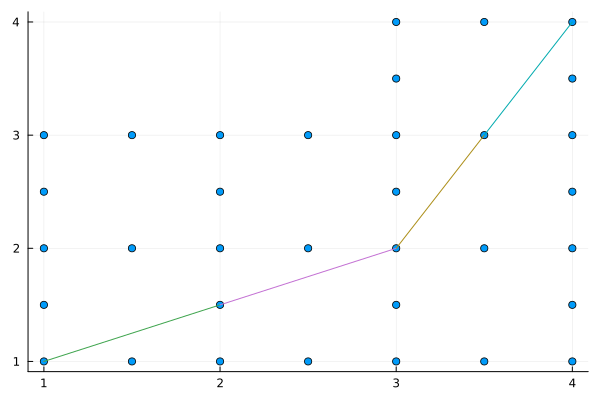

In [5]:
path, cost = Paths.astar(nodesByPosition[source], nodesByPosition[target], n, h)
s = scatterNodes(nodesByPosition)
drawPath(source, path, s)

In [6]:
node = nodesByPosition[(3, 3)]
Paths.populateNeighbors!(node, nodesByPosition, visitedFaces, costs, STEINER_POINTS)

[ Info: populating neighbors of Node((3.0, 3.0), Paths._Edge[->(2.5, 3.0), true, 1.5, ->(3.0, 2.5), true, 1.5, ->(2.0, 2.0), false, 4.242640687119286, ->(2.0, 2.5), false, 3.3541019662496847, ->(2.5, 2.0), false, 3.3541019662496847, ->(2.0, 2.5), false, 3.3541019662496847, ->(2.5, 2.0), false, 3.3541019662496847, ->(3.0, 2.5), true, 0.5, ->(3.5, 3.0), true, 0.5, ->(4.0, 2.0), false, 1.4142135623730951, ->(3.5, 2.0), false, 1.118033988749895, ->(3.5, 2.0), false, 1.118033988749895, ->(4.0, 2.5), false, 1.118033988749895, ->(4.0, 2.5), false, 1.118033988749895, ->(3.0, 3.5), true, 0.5, ->(3.5, 3.0), true, 0.5, ->(4.0, 4.0), false, 1.4142135623730951, ->(3.5, 4.0), false, 1.118033988749895, ->(4.0, 3.5), false, 1.118033988749895, ->(3.5, 4.0), false, 1.118033988749895, ->(4.0, 3.5), false, 1.118033988749895])
[ Info: (3, 3) in Set([(3, 2), (1, 2), (3, 1), (1, 1), (3, 3), (2, 2), (2, 1)]): true
[ Info: (2, 3) in Set([(3, 2), (1, 2), (3, 1), (1, 1), (3, 3), (2, 2), (2, 1)]): false
[ Info: a

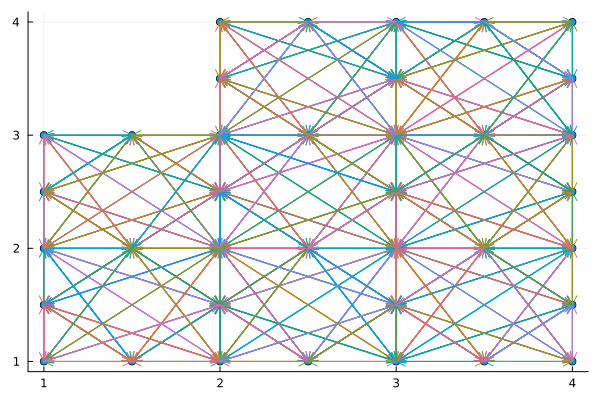

In [7]:
draw(nodesByPosition)